In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\TUF ASUS\Intellipat\SQL\PRT\IndianWeatherRepository.csv")

print(df.head())

df['last_updated'] = pd.to_datetime(df['last_updated'])
df = df.sort_values(['location_name','last_updated'])

In [ ]:
#Making the Data Forecast Ready for Aalysis
df['day'] = df['last_updated'].dt.day
df['month'] = df['last_updated'].dt.month
df['hour'] = df['last_updated'].dt.hour
df['dayofweek'] = df['last_updated'].dt.dayofweek

In [18]:
drop_cols = [
    'last_updated_epoch','temperature_fahrenheit','feels_like_celsius',
    'feels_like_fahrenheit','wind_mph','wind_degree','wind_direction',
    'pressure_in','precip_in','visibility_km','visibility_miles',
    'gust_mph','gust_kph','air_quality_Carbon_Monoxide',
    'air_quality_Ozone','air_quality_Nitrogen_dioxide',
    'air_quality_Sulphur_dioxide','air_quality_us-epa-index',
    'air_quality_gb-defra-index','sunrise','sunset',
    'moonrise','moonset','moon_phase','moon_illumination','country'
]
df = df.drop(columns=drop_cols)


In [22]:
numeric_cols = df.select_dtypes(include='number').columns

#Not necessary as we already have 1 data per day per location
#daily = df.groupby('location_name').resample('D', on='last_updated')[numeric_cols].mean().reset_index()
print(numeric_cols)
#print(daily)

Index(['latitude', 'longitude', 'temperature_celsius', 'wind_kph',
       'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'uv_index',
       'air_quality_PM2.5', 'air_quality_PM10', 'day', 'month', 'hour',
       'dayofweek'],
      dtype='object')


In [21]:
print(df.info())
print(df.head())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
Index: 18055 entries, 514 to 17744
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   location_name        18055 non-null  object        
 1   region               18055 non-null  object        
 2   latitude             18055 non-null  float64       
 3   longitude            18055 non-null  float64       
 4   timezone             18055 non-null  object        
 5   last_updated         18055 non-null  datetime64[ns]
 6   temperature_celsius  18055 non-null  float64       
 7   condition_text       18055 non-null  object        
 8   wind_kph             18055 non-null  float64       
 9   pressure_mb          18055 non-null  float64       
 10  precip_mm            18055 non-null  float64       
 11  humidity             18055 non-null  int64         
 12  cloud                18055 non-null  int64         
 13  uv_index             18055 non-nul

In [23]:
df.to_csv("weather_clean.csv", index=False)


Rows: 18055
Columns: ['location_name', 'region', 'latitude', 'longitude', 'timezone', 'last_updated', 'temperature_celsius', 'condition_text', 'wind_kph', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'uv_index', 'air_quality_PM2.5', 'air_quality_PM10', 'day', 'month', 'hour', 'dayofweek']
  location_name          region  latitude  longitude      timezone  \
0      Adilabad  Andhra Pradesh     19.67      78.53  Asia/Kolkata   
1      Adilabad  Andhra Pradesh     19.67      78.53  Asia/Kolkata   
2      Adilabad  Andhra Pradesh     19.67      78.53  Asia/Kolkata   

         last_updated  temperature_celsius        condition_text  wind_kph  \
0 2023-08-29 10:45:00                 28.8  Patchy rain possible      17.3   
1 2023-08-30 09:00:00                 28.1                 Sunny      14.0   
2 2023-08-31 05:30:00                 23.6                 Clear       5.8   

   pressure_mb  precip_mm  humidity  cloud  uv_index  air_quality_PM2.5  \
0       1009.0        0.2        66  

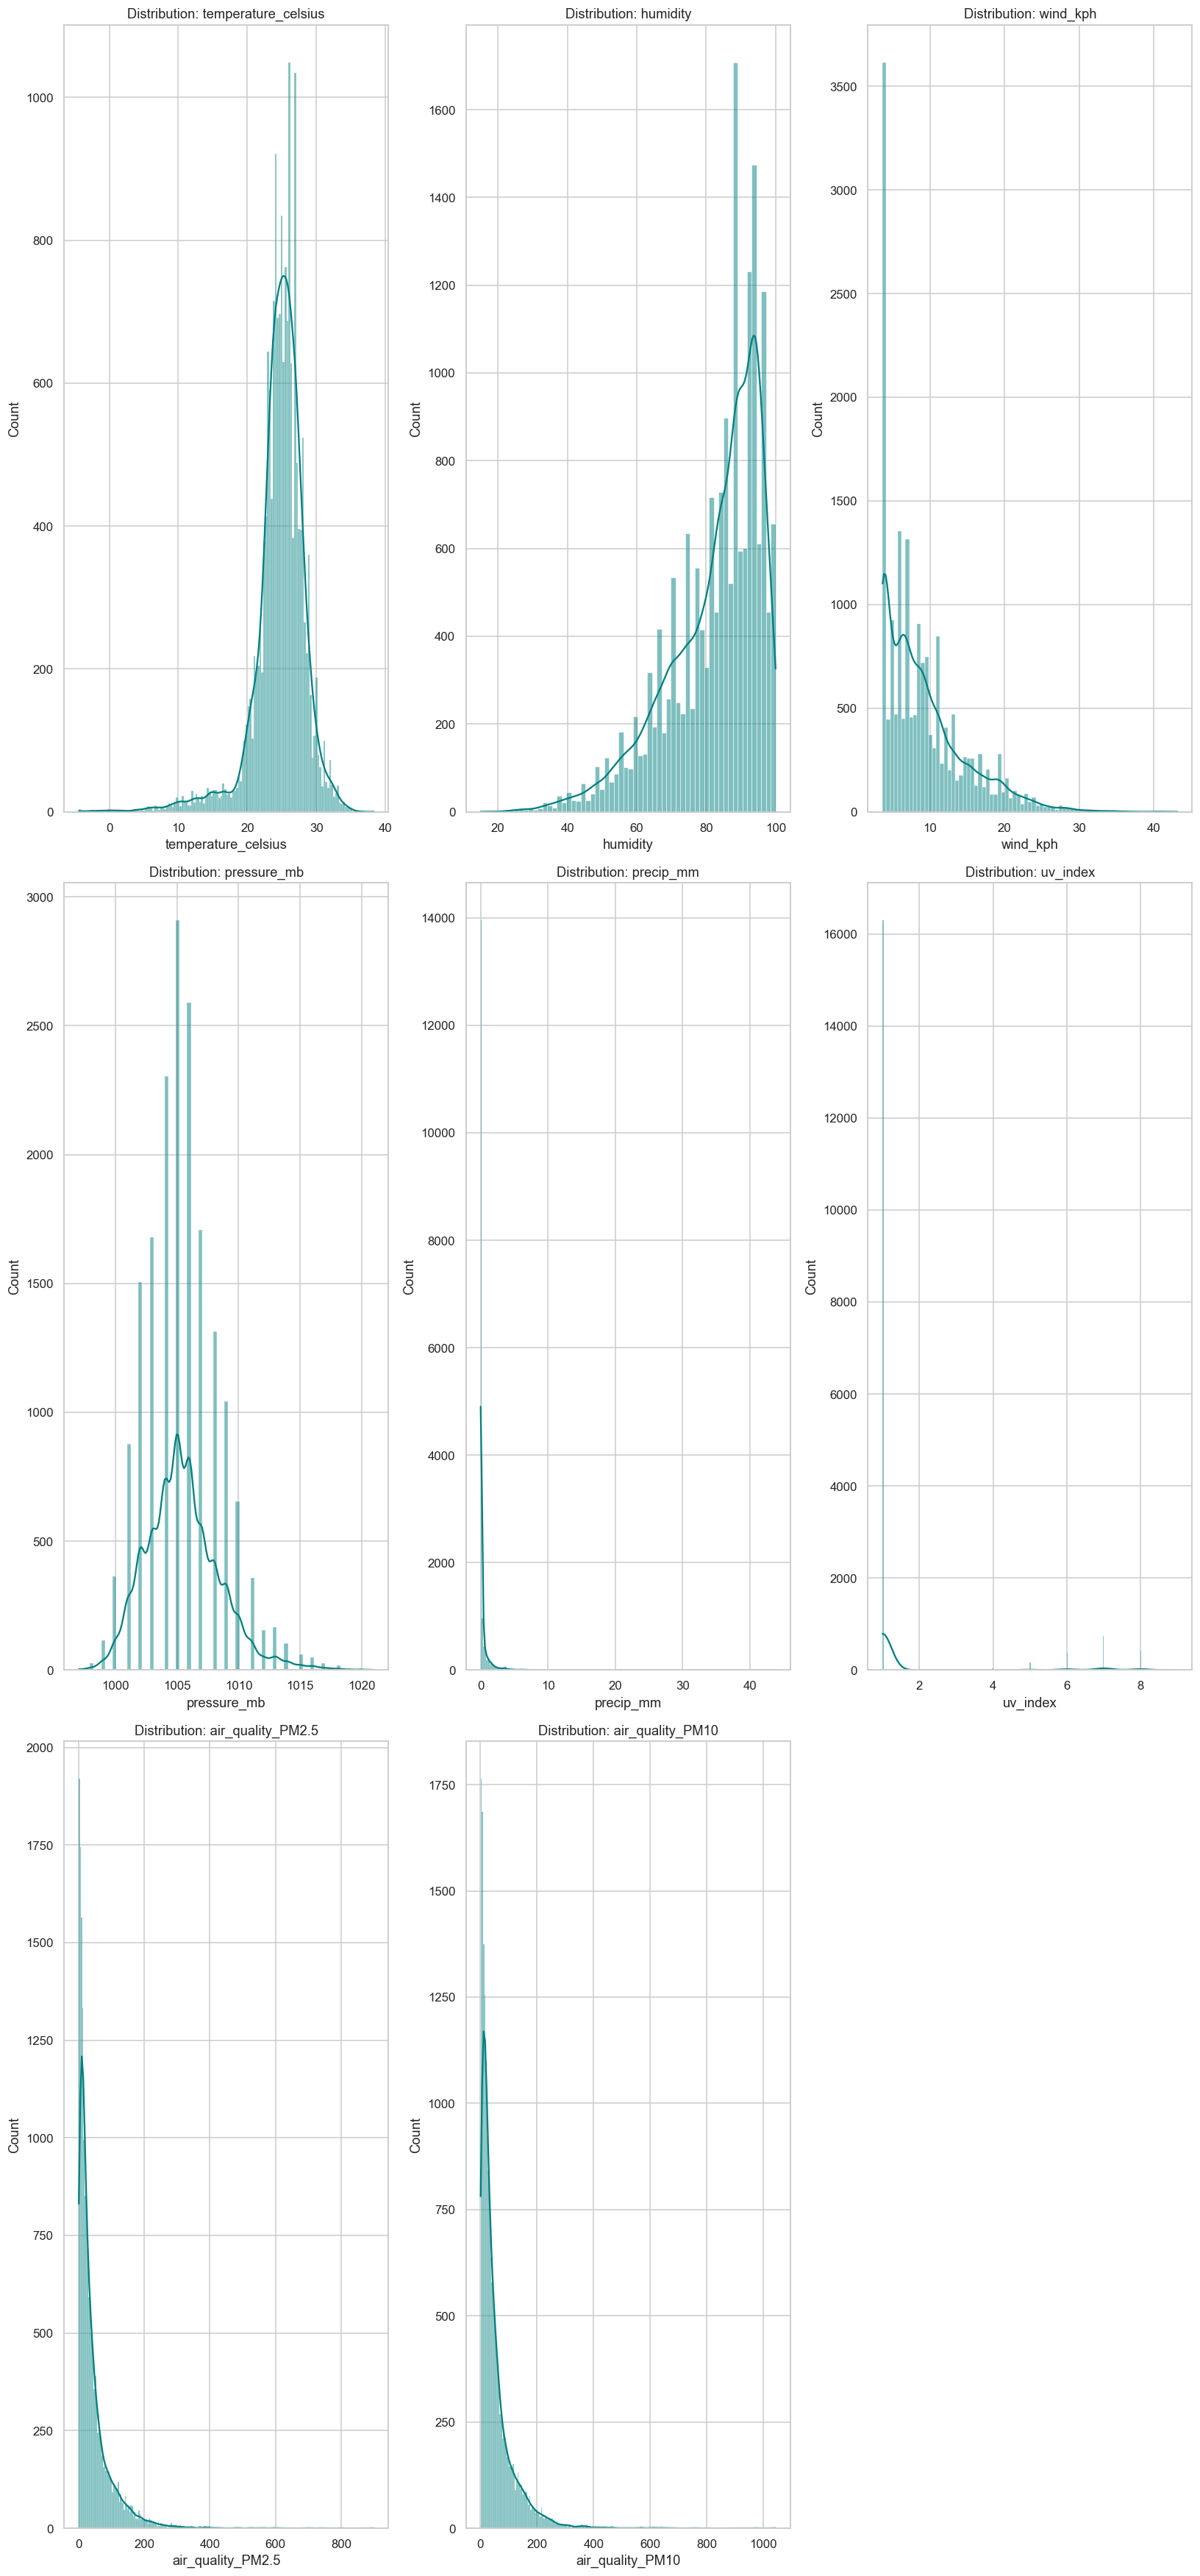

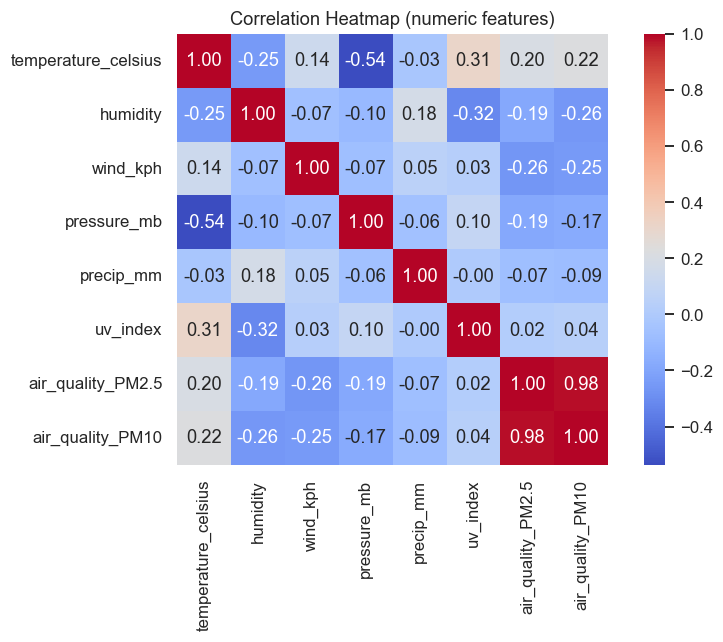

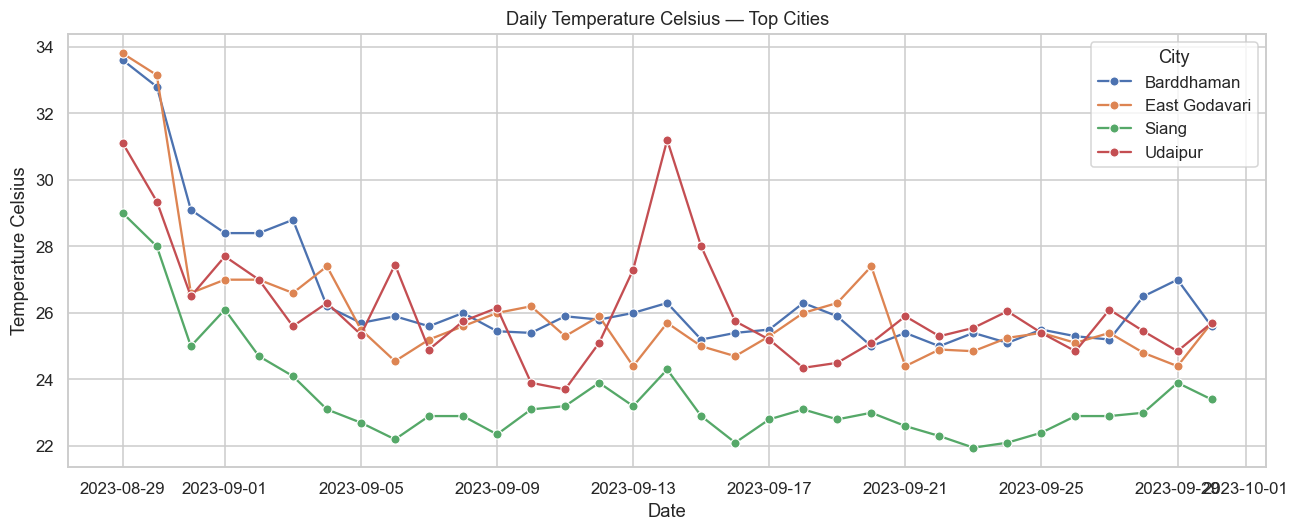

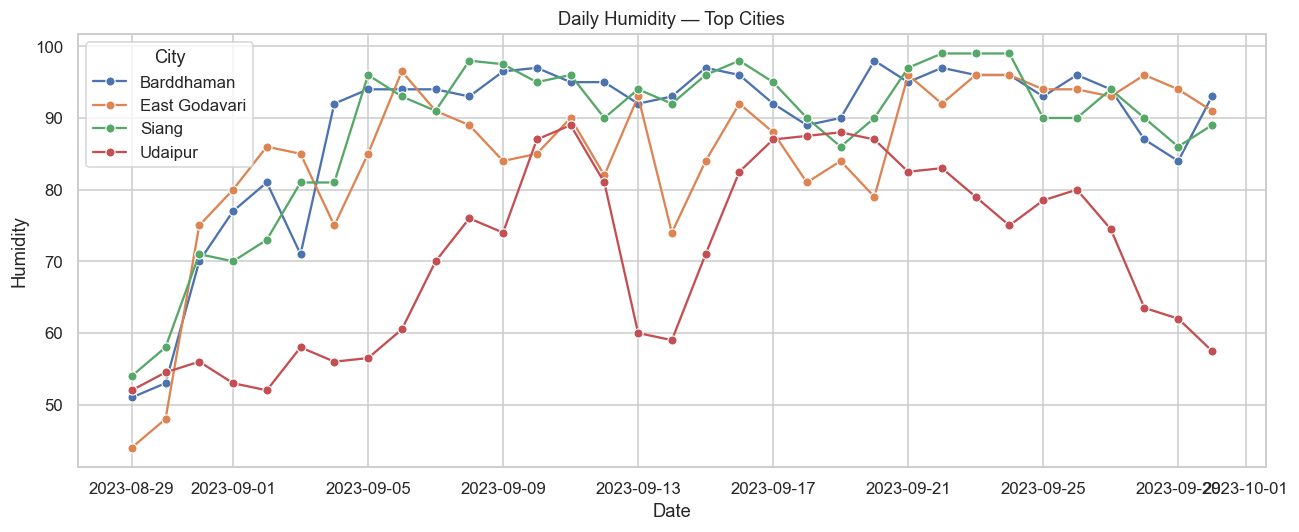

C:\Users\TUF ASUS\AppData\Local\Temp\ipykernel_8524\3687261433.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="dayofweek", y="temperature_celsius", palette="Set2")


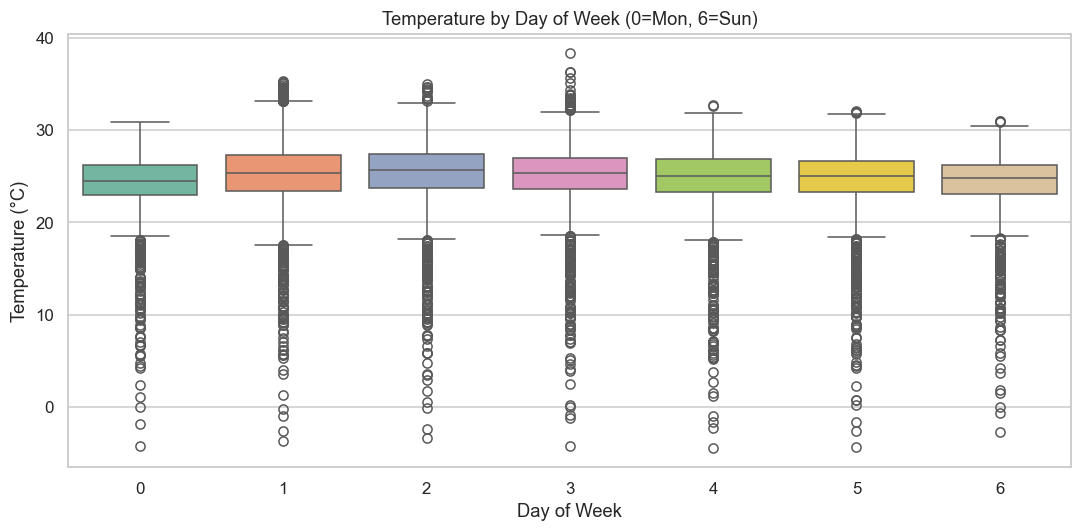

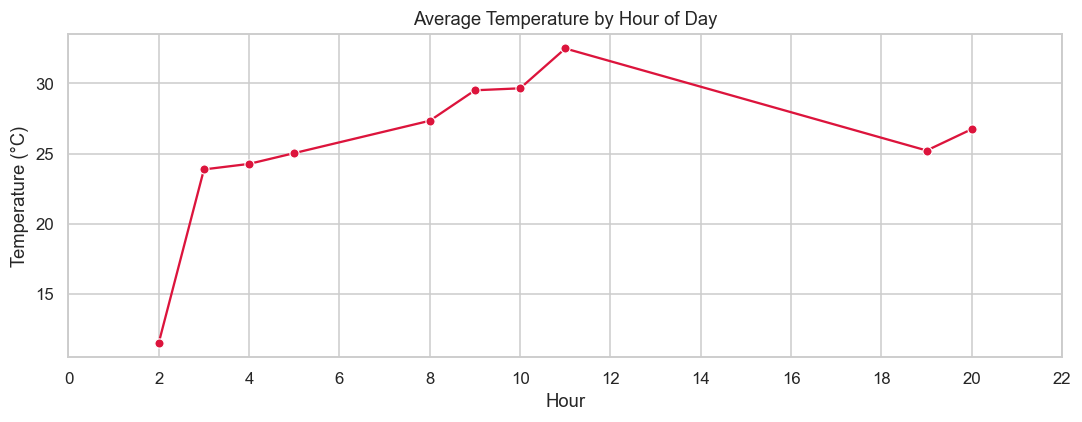

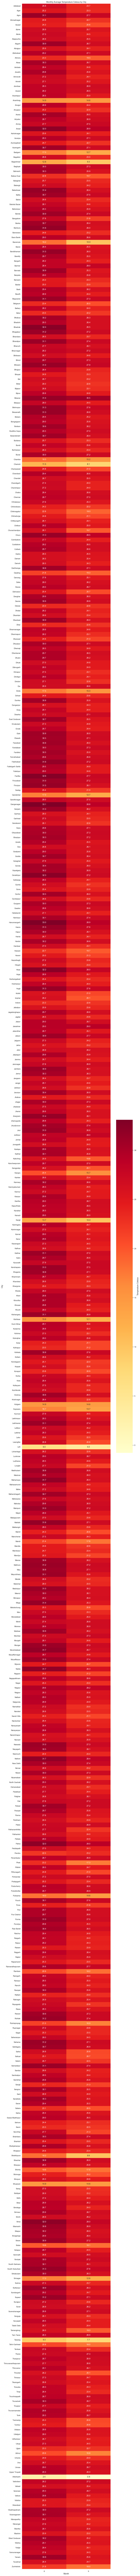

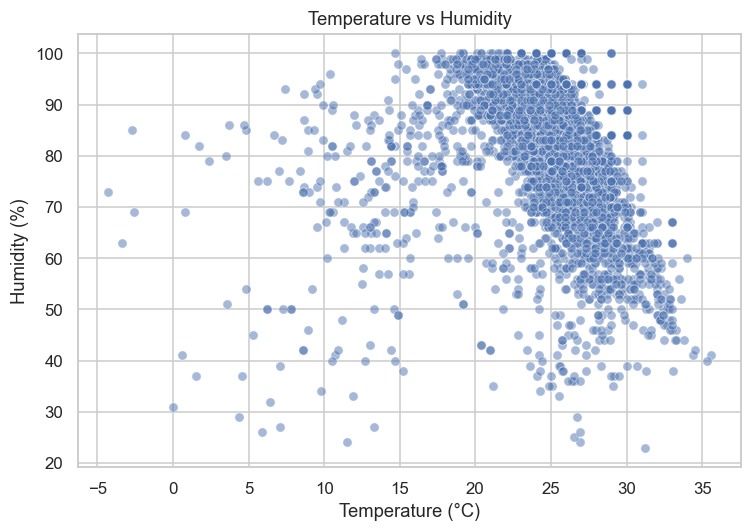

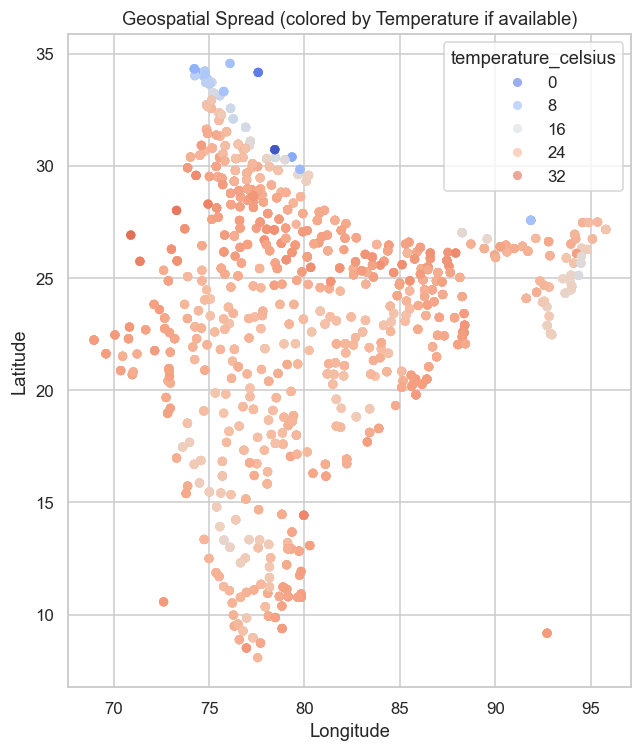

EDA visuals complete ✅


In [37]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 110

# --- 1) Load & basic prep ---
df = pd.read_csv("weather_clean.csv")
# Ensure datetime
if "last_updated" in df.columns:
    df["last_updated"] = pd.to_datetime(df["last_updated"], errors="coerce")
else:
    raise ValueError("Column 'last_updated' is required for time-based visuals.")

# Basic sanity checks
print("Rows:", len(df))
print("Columns:", list(df.columns))
print(df.head(3))

# Infer time parts (safe even if already present)
df["dayofweek"] = df["last_updated"].dt.dayofweek
df["hour"] = df["last_updated"].dt.hour
df["month"] = df["last_updated"].dt.month
df["date"] = df["last_updated"].dt.date

# Choose reasonable numeric candidates (keep it generic)
possible_numeric = [
    "temperature_celsius","humidity","wind_kph","pressure_mb","precip_mm","uv_index",
    "air_quality_PM2.5","air_quality_PM10"
]
num_cols = [c for c in possible_numeric if c in df.columns]

# --- 2) Quick distributions (histograms) ---
if num_cols:
    n = len(num_cols)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*n), squeeze=False)
    for i, col in enumerate(num_cols):
        ax = axes[i // ncols, i % ncols]
        sns.histplot(data=df, x=col, kde=True, ax=ax, color="teal")
        ax.set_title(f"Distribution: {col}")
    for j in range(i+1, nrows*ncols):
        axes[j // ncols, j % ncols].axis("off")
    plt.tight_layout(); plt.show()

# --- 3) Correlation heatmap (numeric only) ---
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
    plt.title("Correlation Heatmap (numeric features)")
    plt.tight_layout(); plt.show()

# --- 4) Time-series trends for selected cities ---
if "location_name" in df.columns:
    # pick top cities by data count
    top_cities = df["location_name"].value_counts().head(4).index.tolist()
    sub = df[df["location_name"].isin(top_cities)].copy()
    # daily average to smooth noise
    daily = (sub
             .set_index("last_updated")
             .groupby("location_name")
             .resample("D")[num_cols].mean()
             .reset_index())
    for metric in [c for c in ["temperature_celsius","humidity"] if c in num_cols]:
        plt.figure(figsize=(12,5))
        sns.lineplot(data=daily, x="last_updated", y=metric, hue="location_name", marker="o")
        plt.title(f"Daily {metric.replace('_',' ').title()} — Top Cities")
        plt.xlabel("Date"); plt.ylabel(metric.replace("_"," ").title())
        plt.legend(title="City"); plt.grid(True)
        plt.tight_layout(); plt.show()

# --- 5) Weekly & Hourly seasonality (faceted) ---
if "temperature_celsius" in df.columns and "location_name" in df.columns:
    # Weekday pattern
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x="dayofweek", y="temperature_celsius", palette="Set2")
    plt.title("Temperature by Day of Week (0=Mon, 6=Sun)")
    plt.xlabel("Day of Week"); plt.ylabel("Temperature (°C)")
    plt.tight_layout(); plt.show()

    # Hour-of-day pattern (if you have intra-day data)
    if df["hour"].notna().sum() > 0 and df["hour"].nunique() > 1:
        temp_hour = df.groupby("hour", as_index=False)["temperature_celsius"].mean()
        plt.figure(figsize=(10,4))
        sns.lineplot(data=temp_hour, x="hour", y="temperature_celsius", marker="o", color="crimson")
        plt.title("Average Temperature by Hour of Day")
        plt.xlabel("Hour"); plt.ylabel("Temperature (°C)")
        plt.xticks(range(0,24,2)); plt.grid(True)
        plt.tight_layout(); plt.show()

# --- 6) Monthly heatmap (seasonality overview) ---
# build a pivot of monthly x city averages (temperature preferred, fallback to first numeric col)
metric = "temperature_celsius" if "temperature_celsius" in num_cols else (num_cols[0] if num_cols else None)
if metric and "location_name" in df.columns:
    monthly = (df
               .groupby(["location_name","month"], as_index=False)[metric]
               .mean())
    pivot = monthly.pivot(index="location_name", columns="month", values=metric).sort_index()
    plt.figure(figsize=(12, max(4, 0.4*len(pivot))))
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={"label": metric.replace("_"," ").title()})
    plt.title(f"Monthly Average {metric.replace('_',' ').title()} by City")
    plt.xlabel("Month"); plt.ylabel("City")
    plt.tight_layout(); plt.show()

# --- 7) Scatter: Temperature vs Humidity (relationship) ---
if all(c in df.columns for c in ["temperature_celsius","humidity"]):
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df.sample(min(5000, len(df)), random_state=42), 
                    x="temperature_celsius", y="humidity", alpha=0.5)
    plt.title("Temperature vs Humidity")
    plt.xlabel("Temperature (°C)"); plt.ylabel("Humidity (%)")
    plt.tight_layout(); plt.show()

# --- 8) Optional: Geo plot if coordinates exist ---
if all(c in df.columns for c in ["latitude","longitude"]):
    # Very simple lat/lon scatter (not a real map, but conveys spread)
    plt.figure(figsize=(6,7))
    sns.scatterplot(data=df.sample(min(5000,len(df)), random_state=42),
                    x="longitude", y="latitude", hue=df.get("temperature_celsius", None),
                    palette="coolwarm", alpha=0.6, edgecolor="none")
    plt.title("Geospatial Spread (colored by Temperature if available)")
    plt.xlabel("Longitude"); plt.ylabel("Latitude")
    plt.tight_layout(); plt.show()

print("EDA visuals complete ✅")

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load cleaned dataset
df = pd.read_csv("weather_clean.csv")
df["last_updated"] = pd.to_datetime(df["last_updated"])

drop_cols = [
    'condition_text','wind_kph', 'latitude','longitude','pressure_mb',
    'precip_mm','cloud','uv_index','air_quality_PM2.5','day','month','hour',
    'air_quality_PM10','timezone'
]
df = df.drop(columns=drop_cols)
print(df)

      location_name          region        last_updated  temperature_celsius  \
0          Adilabad  Andhra Pradesh 2023-08-29 10:45:00                 28.8   
1          Adilabad  Andhra Pradesh 2023-08-30 09:00:00                 28.1   
2          Adilabad  Andhra Pradesh 2023-08-31 05:30:00                 23.6   
3          Adilabad  Andhra Pradesh 2023-09-01 05:15:00                 24.0   
4          Adilabad  Andhra Pradesh 2023-09-02 05:30:00                 26.0   
...             ...             ...                 ...                  ...   
18050     Zunheboto        Nagaland 2023-09-26 03:45:00                 17.5   
18051     Zunheboto        Nagaland 2023-09-27 03:30:00                 18.0   
18052     Zunheboto        Nagaland 2023-09-28 03:30:00                 18.0   
18053     Zunheboto        Nagaland 2023-09-29 04:15:00                 17.5   
18054     Zunheboto        Nagaland 2023-09-30 03:15:00                 17.9   

       humidity  dayofweek  
0         

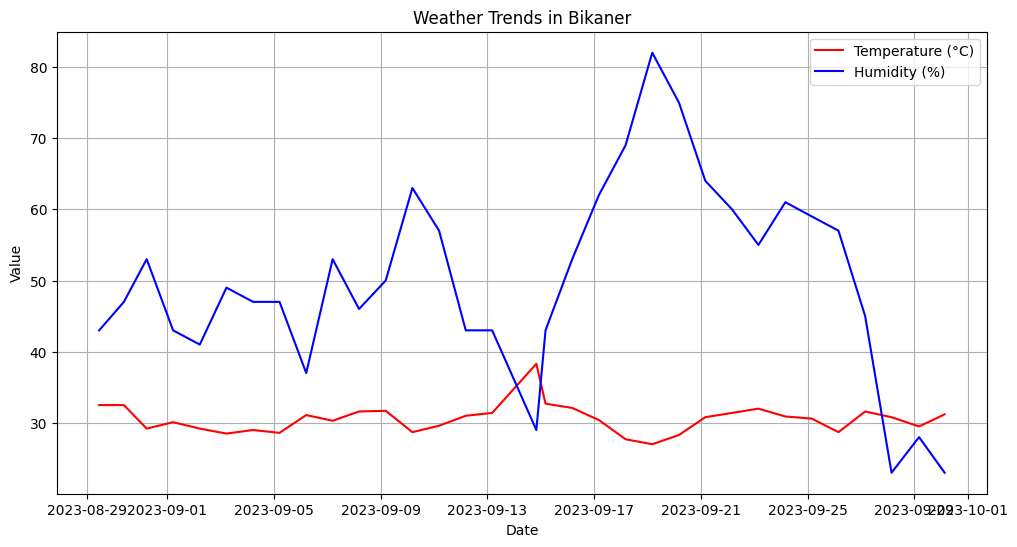

In [27]:

# Focus on one city first
city = "Bikaner"
city_df = df[df["location_name"] == city].sort_values("last_updated").copy()

plt.figure(figsize=(12,6))
plt.plot(city_df["last_updated"], city_df["temperature_celsius"], label="Temperature (°C)", color="red")
plt.plot(city_df["last_updated"], city_df["humidity"], label="Humidity (%)", color="blue")

plt.title(f"Weather Trends in {city}")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()




In [29]:
# Feature engineering
city_df["dayofweek"] = city_df["last_updated"].dt.dayofweek

# Create lag features
for lag in [1, 2, 3]:
    city_df[f"temp_lag{lag}"] = city_df["temperature_celsius"].shift(lag)
    city_df[f"hum_lag{lag}"] = city_df["humidity"].shift(lag)

# Rolling mean
city_df["temp_roll3"] = city_df["temperature_celsius"].shift(1).rolling(3).mean()
city_df["hum_roll3"]  = city_df["humidity"].shift(1).rolling(3).mean()

# Drop NaN rows (from lags)
city_df = city_df.dropna().reset_index(drop=True)

print(city_df)


   location_name     region        last_updated  temperature_celsius  \
0        Bikaner  Rajasthan 2023-09-04 05:15:00                 29.0   
1        Bikaner  Rajasthan 2023-09-05 05:00:00                 28.6   
2        Bikaner  Rajasthan 2023-09-06 05:00:00                 31.1   
3        Bikaner  Rajasthan 2023-09-07 04:45:00                 30.3   
4        Bikaner  Rajasthan 2023-09-08 04:30:00                 31.6   
5        Bikaner  Rajasthan 2023-09-09 04:30:00                 31.7   
6        Bikaner  Rajasthan 2023-09-10 04:30:00                 28.7   
7        Bikaner  Rajasthan 2023-09-11 04:30:00                 29.6   
8        Bikaner  Rajasthan 2023-09-12 04:30:00                 31.0   
9        Bikaner  Rajasthan 2023-09-13 04:15:00                 31.4   
10       Bikaner  Rajasthan 2023-09-14 20:00:00                 38.3   
11       Bikaner  Rajasthan 2023-09-15 04:15:00                 32.7   
12       Bikaner  Rajasthan 2023-09-16 04:15:00                 

In [30]:

# Define features/targets
X = city_df[["dayofweek","temp_lag1","temp_lag2","temp_lag3","temp_roll3"]]
y_temp = city_df["temperature_celsius"]

X_hum = city_df[["dayofweek","hum_lag1","hum_lag2","hum_lag3","hum_roll3"]]
y_hum = city_df["humidity"]

# Train models
model_temp = LinearRegression().fit(X, y_temp)
model_hum  = LinearRegression().fit(X_hum, y_hum)

# --- Forecast next 2 days ---
last_row = city_df.iloc[-1].copy()
print(last_row)


location_name                      Bikaner
region                           Rajasthan
last_updated           2023-09-30 03:15:00
temperature_celsius                   31.2
humidity                                23
dayofweek                                5
temp_lag1                             29.5
hum_lag1                              28.0
temp_lag2                             30.8
hum_lag2                              23.0
temp_lag3                             31.6
hum_lag3                              45.0
temp_roll3                       30.633333
hum_roll3                             32.0
Name: 26, dtype: object


In [35]:
future_preds = []
for step in range(1, 3):  # 2 days ahead
    next_date = last_row["last_updated"] + pd.Timedelta(days=step)
    dow = next_date.dayofweek
    
    # Prepare features from last row values
    feats_temp = [[dow, last_row["temperature_celsius"], 
                   last_row["temp_lag1"], last_row["temp_lag2"], last_row["temp_roll3"]]]
    pred_temp = model_temp.predict(feats_temp)[0]
    print(feats_temp)
    print(pred_temp)

    feats_hum = [[dow, last_row["humidity"], 
                  last_row["hum_lag1"], last_row["hum_lag2"], last_row["hum_roll3"]]]
    pred_hum = model_hum.predict(feats_hum)[0]
    
    future_preds.append({"city": city, "date": next_date, 
                         "pred_temperature": round(pred_temp,2),
                         "pred_humidity": round(pred_hum,2)})
    
    # Update "last_row" for recursive forecasting
    last_row["temperature_celsius"] = pred_temp
    last_row["humidity"] = pred_hum
    last_row["temp_lag1"] = pred_temp
    last_row["hum_lag1"] = pred_hum
    # shift lags forward (simplified for demo)
    
future_df = pd.DataFrame(future_preds)
print(future_df)


[[6, np.float64(30.329154665163358), np.float64(30.329154665163358), np.float64(30.8), np.float64(30.633333333333336)]]
30.987248782919487
[[0, np.float64(30.987248782919487), np.float64(30.987248782919487), np.float64(30.8), np.float64(30.633333333333336)]]
30.235650030353085
      city                date  pred_temperature  pred_humidity
0  Bikaner 2023-10-01 03:15:00             30.99          57.59
1  Bikaner 2023-10-02 03:15:00             30.24          62.03


c:\Users\TUF ASUS\Intellipat\Data_Analytics_Project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\TUF ASUS\Intellipat\Data_Analytics_Project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\TUF ASUS\Intellipat\Data_Analytics_Project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\TUF ASUS\Intellipat\Data_Analytics_Project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
future_preds = []

# initialize lag state from the last known row
t1, t2, t3 = (last_row["temp_lag1"], last_row["temp_lag2"], last_row["temp_lag3"])
h1, h2, h3 = (last_row["hum_lag1"],  last_row["hum_lag2"],  last_row["hum_lag3"])
base_date   = last_row["last_updated"]

for step in range(1, 3):  # forecast next 2 days
    next_date = base_date + pd.Timedelta(days=step)
    dow = next_date.dayofweek

    # compute rolling means from the three most recent lags (same logic as shift(1).rolling(3).mean)
    temp_roll3 = np.mean([t1, t2, t3])
    hum_roll3  = np.mean([h1, h2, h3])

    # features must match training order exactly
    feats_temp = [[dow, t1, t2, t3, temp_roll3]]
    feats_hum  = [[dow, h1, h2, h3, hum_roll3]]

    pred_temp = float(model_temp.predict(feats_temp)[0])
    pred_hum  = float(model_hum.predict(feats_hum)[0])

    future_preds.append({
        "city": city,
        "date": next_date,
        "pred_temperature": round(pred_temp, 2),
        "pred_humidity": round(pred_hum, 2)
    })

    # shift lags forward for the next step (recursive forecasting)
    t3, t2, t1 = t2, t1, pred_temp
    h3, h2, h1 = h2, h1, pred_hum

future_df = pd.DataFrame(future_preds)
print(future_df)

      city                date  pred_temperature  pred_humidity
0  Bikaner 2023-10-01 03:15:00             30.50          32.47
1  Bikaner 2023-10-02 03:15:00             29.97          36.98


c:\Users\TUF ASUS\Intellipat\Data_Analytics_Project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\TUF ASUS\Intellipat\Data_Analytics_Project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\TUF ASUS\Intellipat\Data_Analytics_Project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\TUF ASUS\Intellipat\Data_Analytics_Project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


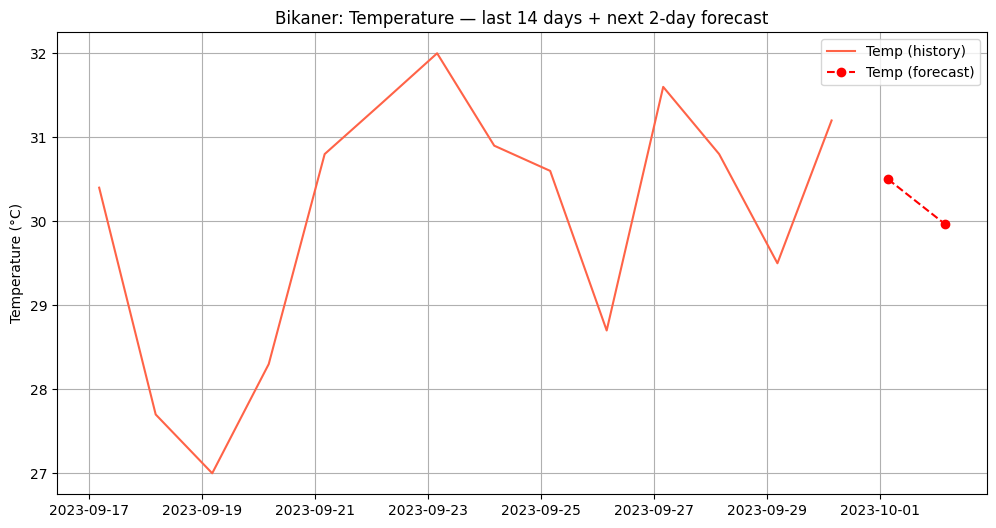

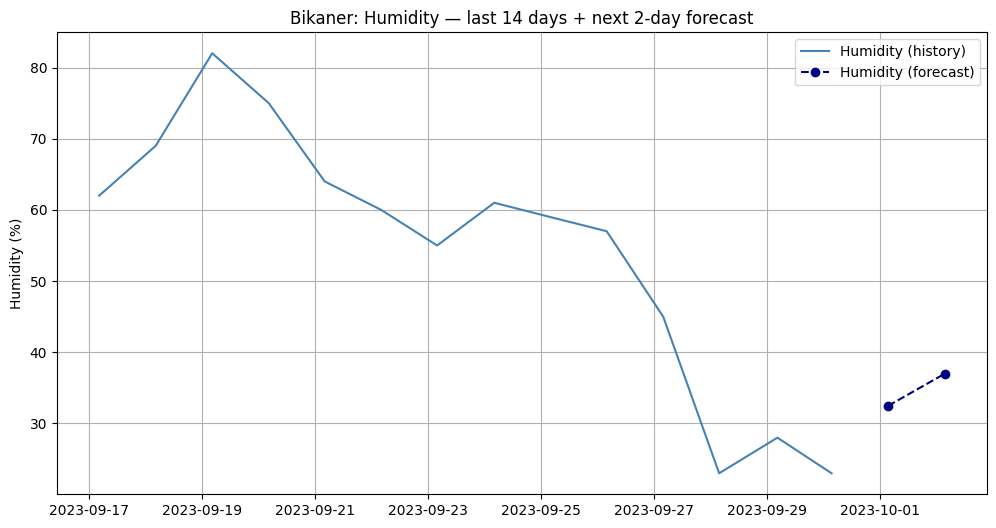

In [32]:
import matplotlib.pyplot as plt

hist = city_df[["last_updated","temperature_celsius","humidity"]].tail(14).rename(
    columns={"last_updated":"date", "temperature_celsius":"Temperature (°C)", "humidity":"Humidity (%)"}
)
pred_vis = future_df.rename(columns={
    "date":"date",
    "pred_temperature":"Temperature (°C)",
    "pred_humidity":"Humidity (%)"
})[["date","Temperature (°C)","Humidity (%)"]]

plt.figure(figsize=(12,6))
plt.plot(hist["date"], hist["Temperature (°C)"], label="Temp (history)", color="tomato")
plt.plot(pred_vis["date"], pred_vis["Temperature (°C)"], "o--", label="Temp (forecast)", color="red")
plt.ylabel("Temperature (°C)")
plt.title(f"{city}: Temperature — last 14 days + next 2-day forecast")
plt.grid(True); plt.legend(); plt.show()

plt.figure(figsize=(12,6))
plt.plot(hist["date"], hist["Humidity (%)"], label="Humidity (history)", color="steelblue")
plt.plot(pred_vis["date"], pred_vis["Humidity (%)"], "o--", label="Humidity (forecast)", color="navy")
plt.ylabel("Humidity (%)")
plt.title(f"{city}: Humidity — last 14 days + next 2-day forecast")
plt.grid(True); plt.legend(); plt.show()


[Temperature] MAE=2.40  RMSE=3.86  MAPE=7.5%
[Humidity]    MAE=8.63  RMSE=11.41  MAPE=21.5%


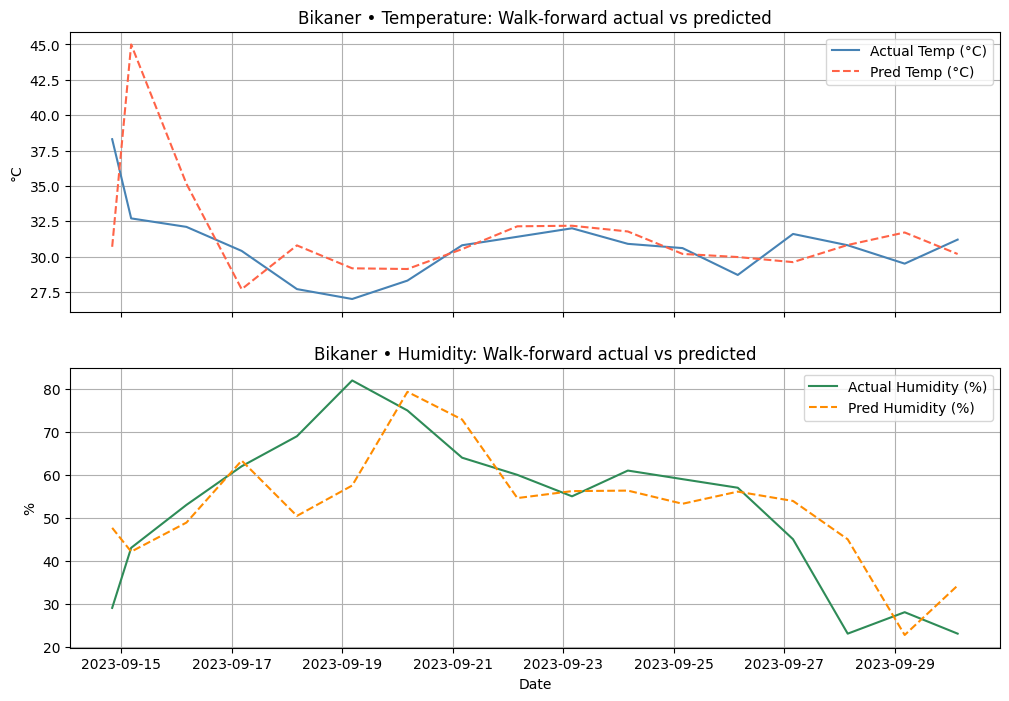

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- feature sets (match your training order) ---
temp_feats = ["dayofweek","temp_lag1","temp_lag2","temp_lag3","temp_roll3"]
hum_feats  = ["dayofweek","hum_lag1","hum_lag2","hum_lag3","hum_roll3"]

# how much history before we start validating (to stabilize the first fits)
start_idx = 20 if len(city_df) > 50 else 10

dates, yT_true, yT_pred, yH_true, yH_pred = [], [], [], [], []

for t in range(start_idx, len(city_df)):
    # expanding window: train on [0 .. t-1], predict t
    train = city_df.iloc[:t]
    X_T = train[temp_feats]; y_T = train["temperature_celsius"]
    X_H = train[hum_feats];  y_H = train["humidity"]

    mT = LinearRegression().fit(X_T, y_T)
    mH = LinearRegression().fit(X_H, y_H)

    X_t_T = city_df.iloc[[t]][temp_feats]
    X_t_H = city_df.iloc[[t]][hum_feats]

    pred_T = float(mT.predict(X_t_T)[0])
    pred_H = float(mH.predict(X_t_H)[0])

    dates.append(city_df.iloc[t]["last_updated"])
    yT_true.append(float(city_df.iloc[t]["temperature_celsius"]))
    yH_true.append(float(city_df.iloc[t]["humidity"]))
    yT_pred.append(pred_T)
    yH_pred.append(pred_H)

# --- metrics ---
def mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

T_mae  = mean_absolute_error(yT_true, yT_pred)
T_rmse = np.sqrt(mean_squared_error(yT_true, yT_pred))
T_mape = mape(yT_true, yT_pred)

H_mae  = mean_absolute_error(yH_true, yH_pred)
H_rmse = np.sqrt(mean_squared_error(yH_true, yH_pred))
H_mape = mape(yH_true, yH_pred)

print(f"[Temperature] MAE={T_mae:.2f}  RMSE={T_rmse:.2f}  MAPE={T_mape:.1f}%")
print(f"[Humidity]    MAE={H_mae:.2f}  RMSE={H_rmse:.2f}  MAPE={H_mape:.1f}%")

# --- quick visuals: actual vs predicted ---
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(dates, yT_true, label="Actual Temp (°C)", color="steelblue")
ax[0].plot(dates, yT_pred, label="Pred Temp (°C)", color="tomato", linestyle="--")
ax[0].set_title(f"{city} • Temperature: Walk-forward actual vs predicted")
ax[0].set_ylabel("°C"); ax[0].grid(True); ax[0].legend()

ax[1].plot(dates, yH_true, label="Actual Humidity (%)", color="seagreen")
ax[1].plot(dates, yH_pred, label="Pred Humidity (%)", color="darkorange", linestyle="--")
ax[1].set_title(f"{city} • Humidity: Walk-forward actual vs predicted")
ax[1].set_ylabel("%"); ax[1].grid(True); ax[1].legend()
plt.xlabel("Date")
plt.show()